<a href="https://colab.research.google.com/github/mayuras7685/Under_water_trash_plastic_detection/blob/main/Underwater_trash_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.5/609.5 kB 8.5 MB/s eta 0:00:00


In [2]:
import requests
import zipfile
import os
import glob
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)

In [4]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [5]:
download_file(
    'https://www.dropbox.com/s/ievh0sesad015z0/trash_inst_material.zip?dl=1',
    'trash_inst_material.zip'
)

unzip(zip_file='trash_inst_material.zip')

Extracted all


## YOLO Dataset Label Format

All the labels are available in the corresponding text files inside the `labels` directories. Modern YOLO models use the following format in the text files.

`<class_number, x_center, y_center, normalized_width, normalized_height>`

The `class_number` ranges from `0` to the `num_classes-1`. So, if there are 16 classes in the dataset, the `class_number` will range from 0-15.

We will visit this again while preparing dataset YAML file.


## Model YAML File

In this section, we prepare the model YAML file. We have already covered the explanation of the YOLO YAML file in the YOLOv8 basic training notebook.

To reiterate, the YAML contains the paths to the different dataset splits and the class names.



In [6]:
cwd = os.getcwd()
print(cwd)

/content


In [7]:
import yaml

attr = {
    'path': cwd+'/trash_inst_material',
    'train': 'train/images',
    'val': 'val/images',

    'names': {
        0: 'rov',
        1: 'plant',
        2: 'animal_fish',
        3: 'animal_starfish',
        4: 'animal_shells',
        5: 'animal_crab',
        6: 'animal_eel',
        7: 'animal_etc',
        8: 'trash_etc',
        9: 'trash_fabric',
        10: 'trash_fishing_gear',
        11: 'trash_metal',
        12: 'trash_paper',
        13: 'trash_plastic',
        14: 'trash_rubber',
        15: 'trash_wood',
    }
}

In [8]:
with open('trashcan_inst_material.yaml', 'w') as f:
    yaml.dump(attr, f)

## YOLOv8 Training

We will train three different models here, namely, **YOLOv8n**, **YOLOv8s**, and **YOLov8m** models.

Running three different training experiments will give is an idea how models of different scales perform on complex datasets.

After training, we will also run inference on images and videos using the best performing model.

### YOLOv8 Nano Segmentation Model Training

In [9]:
EPOCHS = 50
!yolo \
task=segment \
mode=train \
model=yolov8n-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8n-seg \
exist_ok=True \
amp=False

100% 6.73M/6.73M [00:00<00:00, 11.2MB/s]
Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=trashcan_inst_material.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, forma

In [ ]:
download_file(
    'https://www.dropbox.com/s/smdsotzz5al3bi2/trash_segment_inference_data.zip?dl=1',
    'trash_segment_inference_data.zip'
)

unzip(zip_file='trash_segment_inference_data.zip')

Extracted all


In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in either a 1x1 grid or 2x2 grid.
    """
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(1, 1, i+1)
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.axis('off')
            if i == 3:
                break
    plt.tight_layout()
    plt.show()

In [17]:
!yolo predict \
model='runs/segment/yolov8n-seg/weights/best.pt' \
source='trash_inst_material/val/images/' \
name='yolov8m_predict' \
exist_ok=True \
save=True

Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3261184 parameters, 0 gradients

image 1/1204 /content/trash_inst_material/val/images/vid_000002_frame0000013.jpg: 384x640 1 trash_etc, 113.2ms
image 2/1204 /content/trash_inst_material/val/images/vid_000002_frame0000014.jpg: 384x640 1 trash_etc, 7.4ms
image 3/1204 /content/trash_inst_material/val/images/vid_000002_frame0000015.jpg: 384x640 1 trash_etc, 7.1ms
image 4/1204 /content/trash_inst_material/val/images/vid_000002_frame0000016.jpg: 384x640 1 trash_etc, 7.1ms
image 5/1204 /content/trash_inst_material/val/images/vid_000002_frame0000017.jpg: 384x640 1 trash_etc, 7.0ms
image 6/1204 /content/trash_inst_material/val/images/vid_000002_frame0000018.jpg: 384x640 1 trash_etc, 7.0ms
image 7/1204 /content/trash_inst_material/val/images/vid_000002_frame0000019.jpg: 384x640 1 trash_etc, 9.2ms
image 8/1204 /content/trash_inst_material/val/images/vid_000002_frame0000

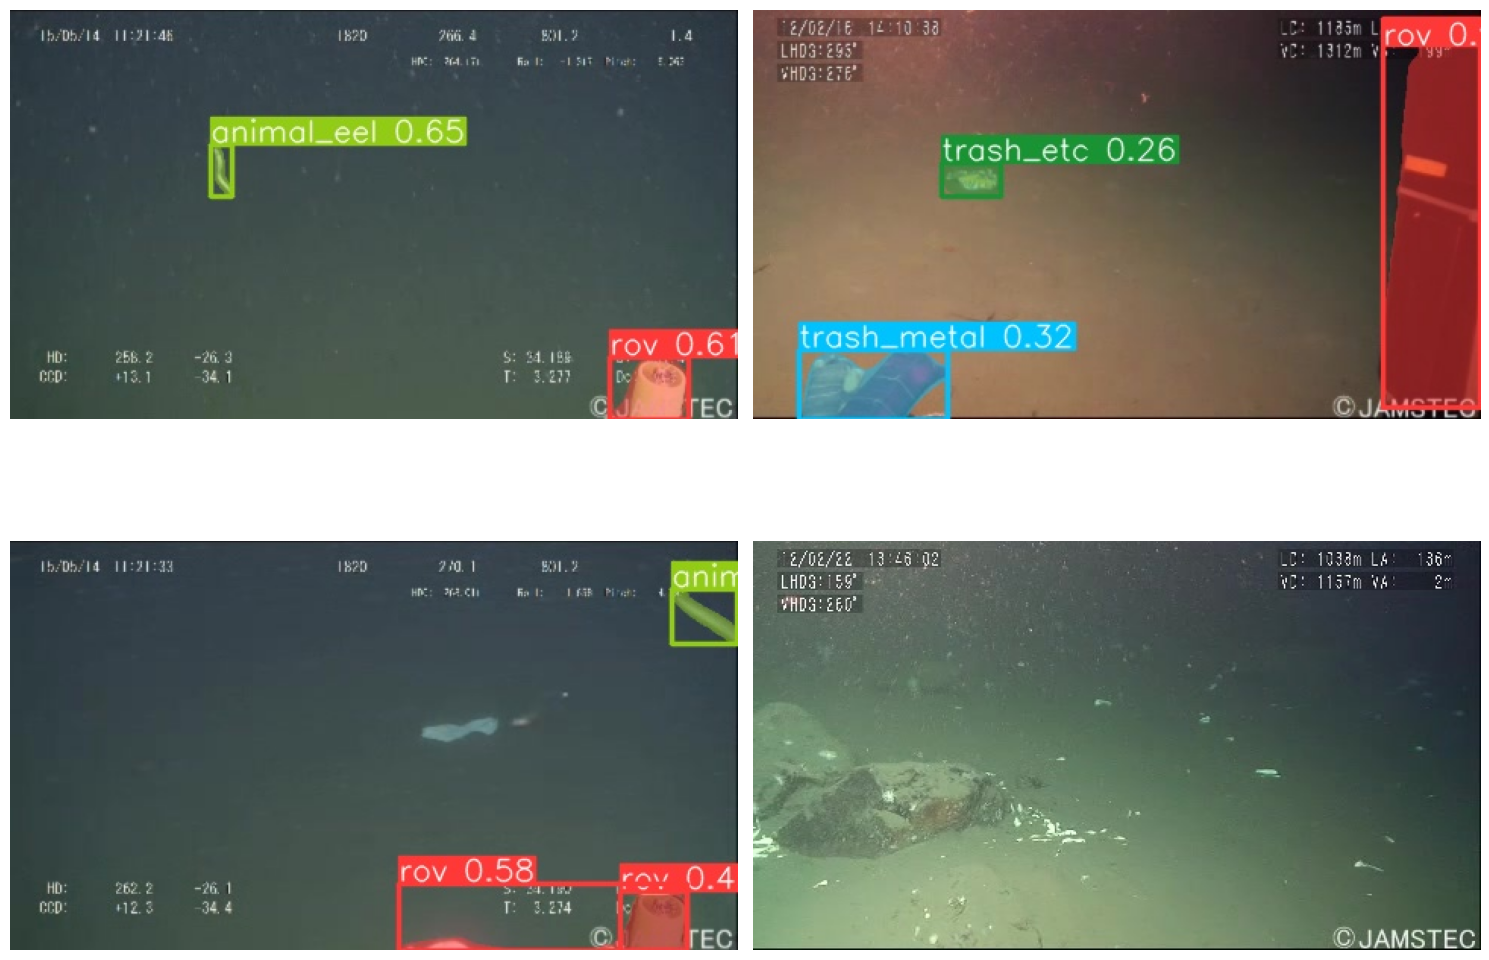

In [ ]:
visualize('runs/segment/yolov8m_predict')

In [16]:
!yolo predict \
model='runs/segment/yolov8n-seg/weights/best.pt' \
source='/content/download.jpg' \
name='yolov8n_predict_im' \
exist_ok=True \
save=True

Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3261184 parameters, 0 gradients

image 1/1 /content/download.jpg: 320x640 (no detections), 111.4ms
Speed: 1.6ms preprocess, 111.4ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/segment/yolov8n_predict_im


In [18]:
!zip -r results.zip /content/runs/segment/yolov8m_predict

  adding: content/runs/segment/yolov8m_predict/ (stored 0%)
  adding: content/runs/segment/yolov8m_predict/vid_000112_frame0000007.jpg (deflated 1%)
  adding: content/runs/segment/yolov8m_predict/vid_000045_frame0000020.jpg (deflated 2%)
  adding: content/runs/segment/yolov8m_predict/vid_000143_frame0000029.jpg (deflated 1%)
  adding: content/runs/segment/yolov8m_predict/vid_000040_frame0000048.jpg (deflated 1%)
  adding: content/runs/segment/yolov8m_predict/vid_000153_frame0000002.jpg (deflated 2%)
  adding: content/runs/segment/yolov8m_predict/vid_000070_frame0000005.jpg (deflated 1%)
  adding: content/runs/segment/yolov8m_predict/vid_000091_frame0000007.jpg (deflated 1%)
  adding: content/runs/segment/yolov8m_predict/vid_000132_frame0000014.jpg (deflated 1%)
  adding: content/runs/segment/yolov8m_predict/vid_000081_frame0000042.jpg (deflated 1%)
  adding: content/runs/segment/yolov8m_predict/vid_000048_frame0000027.jpg (deflated 4%)
  adding: content/runs/segment/yolov8m_predict/vid